In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-economia-y-finanzas/buenos-aires-compras/bac_anual.csv', low_memory=False) # col 23, 24, 25, 109, 110, 111, 112 vacias
# df.head()  

In [3]:
i = 0
for col in df.columns:
    print(str(i) + ' - ' + col)
    i+=1

0 - ocid
1 - id
2 - date
3 - initiationType
4 - tag
5 - tender/id
6 - tender/title
7 - tender/description
8 - tender/status
9 - tender/procuringEntity/id
10 - tender/value/currency
11 - tender/value/amount
12 - tender/procuringEntity/name
13 - tender/procurementMethod
14 - tender/procurementMethodDetails
15 - tender/mainProcurementCategory
16 - tender/additionalProcurementCategories
17 - tender/tenderPeriod/startDate
18 - tender/tenderPeriod/endDate
19 - tender/tenderPeriod/durationInDays
20 - tender/enquiryPeriod/startDate
21 - tender/enquiryPeriod/endDate
22 - tender/enquiryPeriod/durationInDays
23 - tender/techniques/frameworkAgreement/method
24 - tender/techniques/frameworkAgreement/period/startDate
25 - tender/techniques/frameworkAgreement/period/endDate
26 - tender/techniques/frameworkAgreement/period/durationInDays
27 - tender/techniques/frameworkAgreement/value/amount
28 - tender/techniques/frameworkAgreement/value/currency
29 - tender/techniques/hasFrameworkAgreement
30 - tend

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65378 entries, 0 to 65377
Columns: 113 entries, ocid to relatedProcesses/identifier
dtypes: bool(2), float64(15), int64(2), object(94)
memory usage: 55.5+ MB


In [5]:
df.describe()

,tender/value/amount,tender/tenderPeriod/durationInDays,tender/enquiryPeriod/durationInDays,tender/techniques/frameworkAgreement/period/durationInDays,tender/techniques/frameworkAgreement/value/amount,tender/items/0/quantity,tender/items/0/unit/value/amount,awards/0/value/amount,awards/0/contractPeriod/durationInDays,awards/0/items/0/quantity,awards/0/items/0/unit/value/amount,contracts/0/period/durationInDays,contracts/0/value/amount,contracts/0/items/0/quantity,contracts/0/items/0/unit/value/amount,parties/0/contactPoint/telephone,relatedProcesses/id
count,6.537800e+04,65378.000000,65378.000000,79.000000,1.184700e+04,6.537800e+04,6.537800e+04,5.130200e+04,39305.000000,5.130200e+04,5.130200e+04,39484.000000,5.130200e+04,5.130200e+04,5.130200e+04,4.478600e+04,14704.000000
mean,2.965012e+07,14.759460,12.646058,197.075949,5.680365e+05,2.434222e+05,2.324130e+05,2.431158e+06,237.386236,1.947926e+04,2.278666e+05,236.654316,3.186464e+06,1.895716e+04,1.864710e+05,5.401152e+12,99549.558624
std,8.755798e+08,15.832328,14.203103,416.270523,2.351397e+06,5.536786e+06,3.537370e+06,7.894098e+07,287.645071,4.966813e+05,2.926096e+06,277.386241,5.611503e+07,4.902191e+05,2.237831e+06,0.000000e+00,52406.170940
min,0.000000e+00,0.000000,0.000000,0.000000,1.353600e+02,1.000000e-01,0.000000e+00,1.000000e-02,1.000000,7.000000e-02,1.000000e-02,0.000000,1.000000e-02,3.000000e-02,1.000000e-02,5.401152e+12,13907.000000
25%,0.000000e+00,5.000000,4.000000,0.000000,3.041480e+04,5.000000e+00,0.000000e+00,3.392450e+04,90.000000,2.000000e+00,8.100025e+02,88.000000,2.444100e+04,2.000000e+00,6.728700e+02,5.401152e+12,32466.750000
50%,3.105275e+04,8.000000,7.000000,20.000000,1.749990e+05,4.000000e+01,5.810000e+02,1.659600e+05,184.000000,1.000000e+01,6.971415e+03,184.000000,1.276800e+05,1.000000e+01,5.694000e+03,5.401152e+12,120394.500000
75%,2.255962e+05,17.000000,14.000000,71.000000,3.823705e+05,2.000000e+02,1.484952e+04,6.986000e+05,365.000000,1.000000e+02,7.346080e+04,365.000000,4.137986e+05,1.000000e+02,5.428000e+04,5.401152e+12,144870.000000
max,3.561339e+10,119.000000,116.000000,1461.000000,4.399631e+07,1.851043e+08,1.740000e+08,1.233016e+10,11110.000000,4.000000e+07,2.976201e+08,11110.000000,1.973702e+09,4.000000e+07,1.824415e+08,5.401152e+12,149133.000000


In [6]:
df.isnull().sum()

ocid                                 0
id                                   0
date                                 0
initiationType                       0
tag                                  0
                                 ...  
relatedProcesses/id              50674
relatedProcesses/relationship    50674
relatedProcesses/title           50674
relatedProcesses/scheme          50674
relatedProcesses/identifier      53531
Length: 113, dtype: int64

In [7]:
# recuento de los valores faltantes y calculo del porcentaje de los mismos

valores_faltantes = df.isnull().sum()
valores_totales = df.isnull().count()
porcentaje_faltantes = round(valores_faltantes/valores_totales*100,2)
faltantes_df = pd.DataFrame({'cuenta': valores_faltantes, 'porcentaje': porcentaje_faltantes})
print(faltantes_df)

                               cuenta  porcentaje
ocid                                0        0.00
id                                  0        0.00
date                                0        0.00
initiationType                      0        0.00
tag                                 0        0.00
...                               ...         ...
relatedProcesses/id             50674       77.51
relatedProcesses/relationship   50674       77.51
relatedProcesses/title          50674       77.51
relatedProcesses/scheme         50674       77.51
relatedProcesses/identifier     53531       81.88

[113 rows x 2 columns]


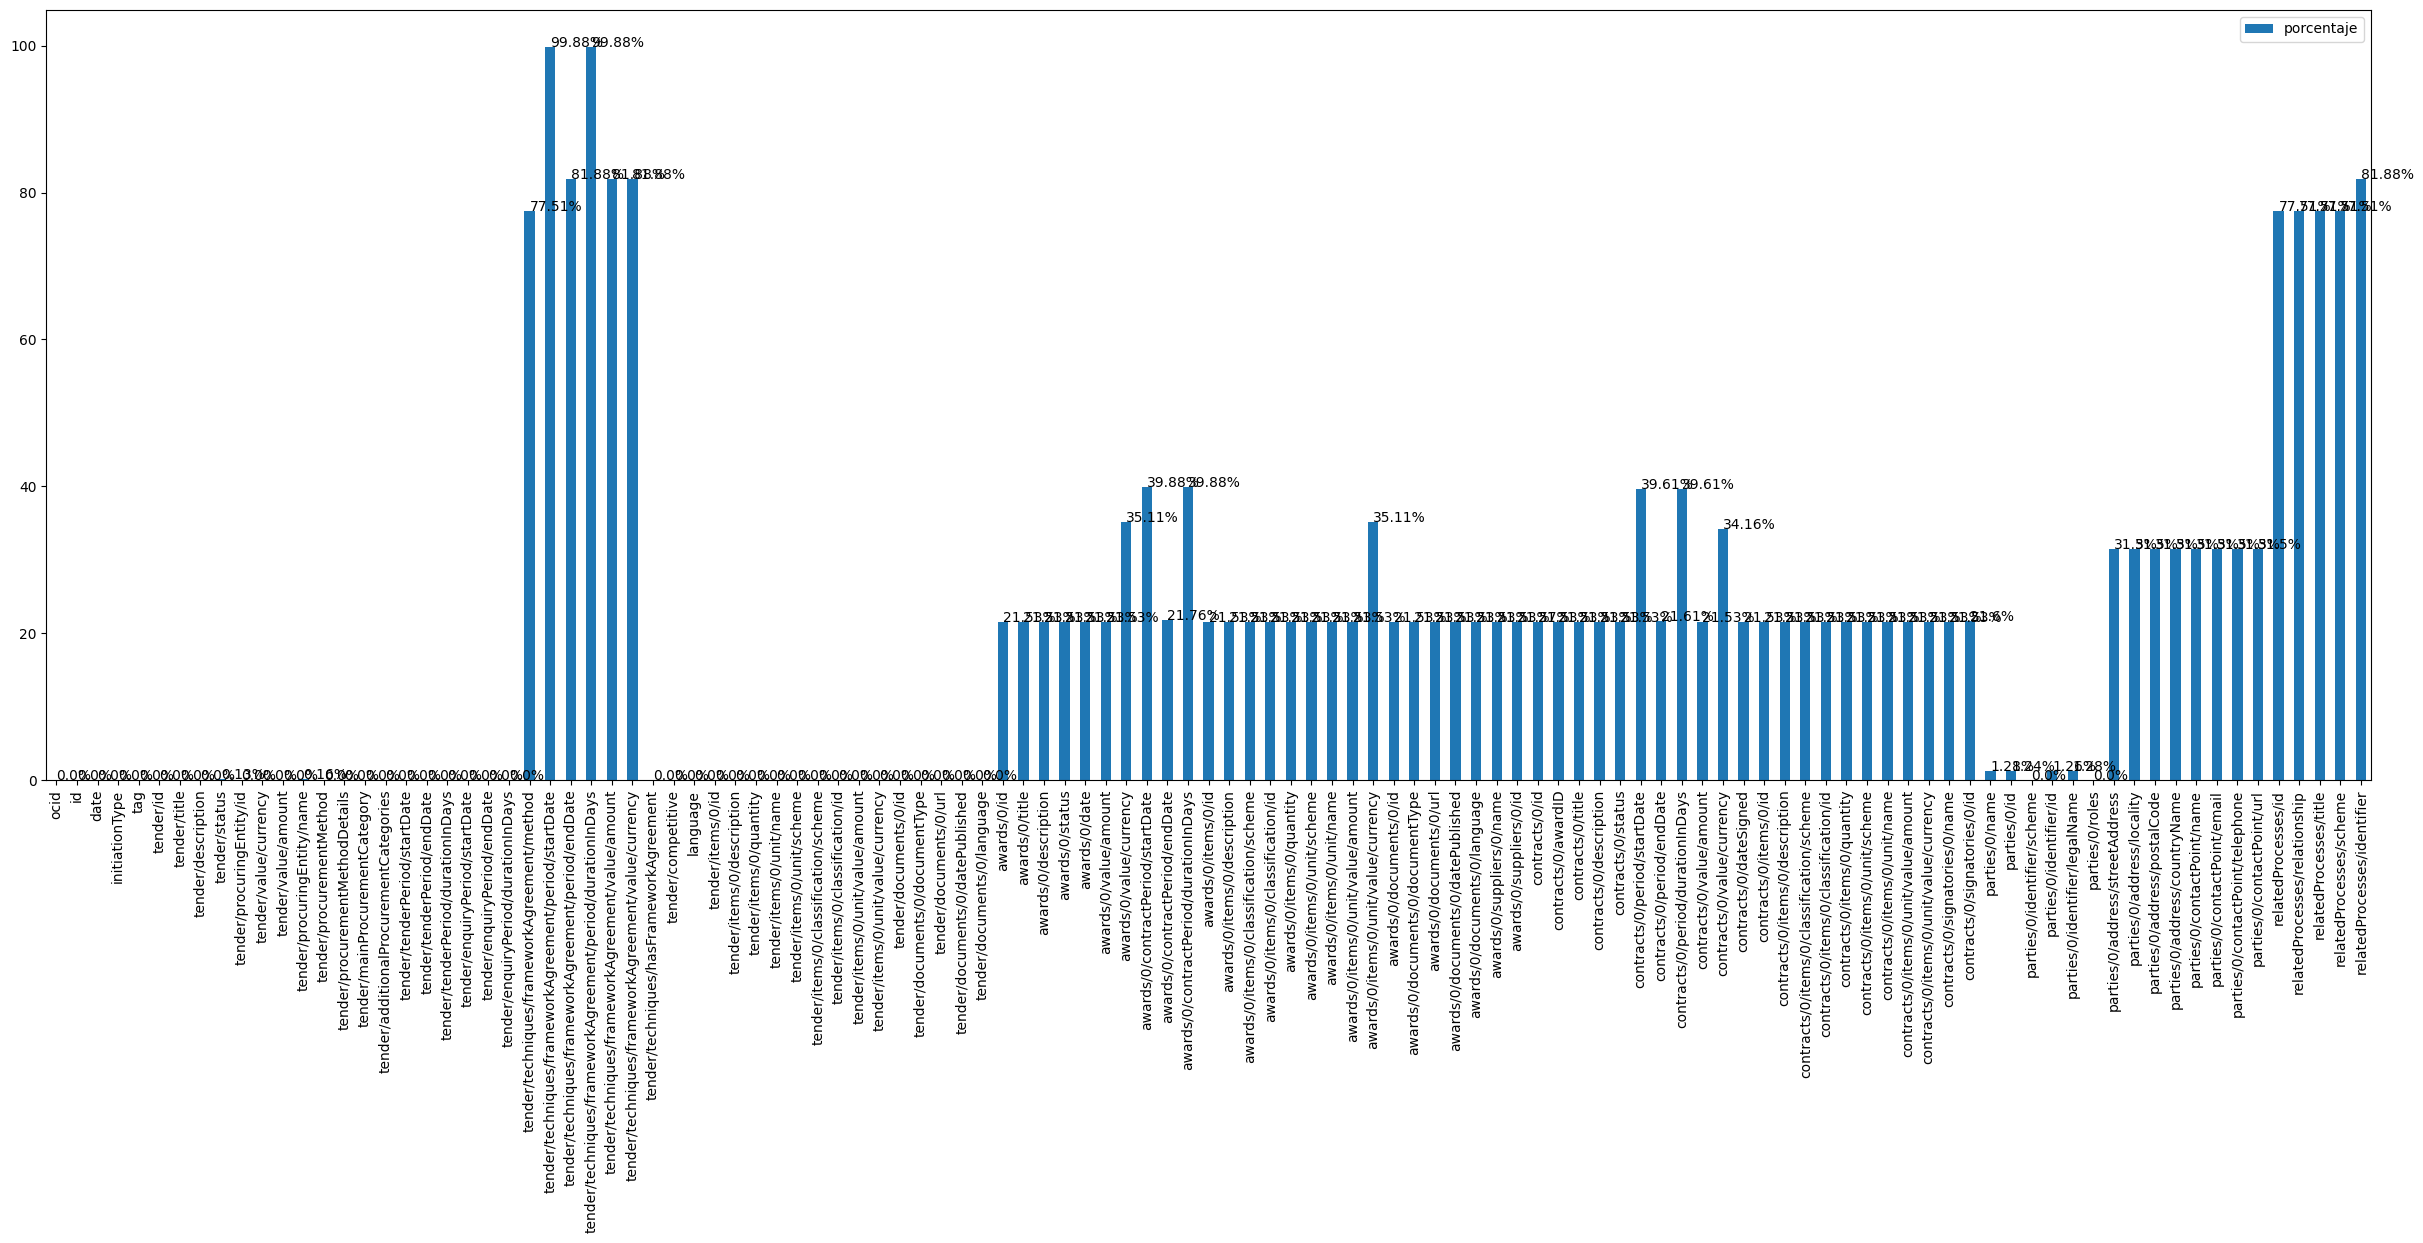

In [8]:
# Grafico los resultados

barchart = faltantes_df.plot.bar(y='porcentaje', figsize = (30, 10))

for index, porcentaje in enumerate(porcentaje_faltantes):
    barchart.text(index, porcentaje, str(porcentaje)+'%')

In [9]:
faltantes_df.query('porcentaje>70')

,cuenta,porcentaje
tender/techniques/frameworkAgreement/method,50674,77.51
tender/techniques/frameworkAgreement/period/startDate,65299,99.88
tender/techniques/frameworkAgreement/period/endDate,53531,81.88
tender/techniques/frameworkAgreement/period/durationInDays,65299,99.88
tender/techniques/frameworkAgreement/value/amount,53531,81.88
tender/techniques/frameworkAgreement/value/currency,53531,81.88
relatedProcesses/id,50674,77.51
relatedProcesses/relationship,50674,77.51
relatedProcesses/title,50674,77.51
relatedProcesses/scheme,50674,77.51


In [10]:
# elimino las filas duplicadas

# dropeo las primeras dos columnas de identificacion, parecen no tener info solo es un index
df = df.drop(['ocid', 'id'], axis=1, index=None)


In [11]:
# elimino todos los duplica
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63300 entries, 0 to 65377
Columns: 111 entries, date to relatedProcesses/identifier
dtypes: bool(2), float64(15), int64(2), object(92)
memory usage: 53.2+ MB


In [12]:
# Veo el tipo de dato por columna

i = 0
for col in df.columns:
    print(str(i) + ' - ' + col + ' - ' + str(df[col].dtype))
    i+=1

0 - date - object
1 - initiationType - object
2 - tag - object
3 - tender/id - object
4 - tender/title - object
5 - tender/description - object
6 - tender/status - object
7 - tender/procuringEntity/id - object
8 - tender/value/currency - object
9 - tender/value/amount - float64
10 - tender/procuringEntity/name - object
11 - tender/procurementMethod - object
12 - tender/procurementMethodDetails - object
13 - tender/mainProcurementCategory - object
14 - tender/additionalProcurementCategories - object
15 - tender/tenderPeriod/startDate - object
16 - tender/tenderPeriod/endDate - object
17 - tender/tenderPeriod/durationInDays - int64
18 - tender/enquiryPeriod/startDate - object
19 - tender/enquiryPeriod/endDate - object
20 - tender/enquiryPeriod/durationInDays - int64
21 - tender/techniques/frameworkAgreement/method - object
22 - tender/techniques/frameworkAgreement/period/startDate - object
23 - tender/techniques/frameworkAgreement/period/endDate - object
24 - tender/techniques/frameworkA

In [13]:
# Formato de fechas AAAA/MM/DD

columnas_fechas = ['date', 'tender/tenderPeriod/startDate', 'tender/tenderPeriod/endDate', 'tender/enquiryPeriod/startDate', 'tender/enquiryPeriod/endDate', 
                   'tender/documents/0/datePublished', 'tender/techniques/frameworkAgreement/period/startDate','tender/techniques/frameworkAgreement/period/endDate',
                   'awards/0/date', 'awards/0/documents/0/datePublished','awards/0/contractPeriod/startDate','awards/0/contractPeriod/endDate', 
                   'awards/0/documents/0/datePublished', 'contracts/0/period/startDate', 'contracts/0/period/endDate', 'contracts/0/dateSigned']

for i in columnas_fechas:
    df[i] = pd.to_datetime(df[i], format="%Y/%m/%d")
    df[i] = df[i].dt.strftime('%Y/%m/%d')
    print(i)


date
tender/tenderPeriod/startDate
tender/tenderPeriod/endDate
tender/enquiryPeriod/startDate
tender/enquiryPeriod/endDate
tender/documents/0/datePublished
tender/techniques/frameworkAgreement/period/startDate
tender/techniques/frameworkAgreement/period/endDate
awards/0/date
awards/0/documents/0/datePublished
awards/0/contractPeriod/startDate
awards/0/contractPeriod/endDate
awards/0/documents/0/datePublished
contracts/0/period/startDate
contracts/0/period/endDate
contracts/0/dateSigned


In [14]:
# divido las columnas segun categorica o numericas

from pandas.core.dtypes.api import is_numeric_dtype, is_string_dtype

num_list = []
cat_list = []

for col in df:
    if is_numeric_dtype(df[col]):
        num_list.append(col)
    elif is_string_dtype(df[col]):
        cat_list.append(col)

# print("Variables numericas: ",num_list)
# print("Variables categoricas: ",cat_list)

In [15]:
# Veo el contenido de cada columna para determinar si tiene datos de interes o puede ser despreciada
i = 0
col_valorunico = []
for col in cat_list:
    Desc = df[col].describe()
    if Desc['unique'] == 1:
        print('columna: ' + str(i) + ' - ' + str(col))
        print(Desc['unique'])
        print(Desc['top'])
        print('')
        print('')
        col_valorunico.append(col)
    i += 1 

columna: 1 - initiationType
1
tender


columna: 18 - tender/techniques/frameworkAgreement/method
1
withAndWithoutReopeningCompetition


columna: 21 - tender/techniques/frameworkAgreement/value/currency
1
ARS


columna: 22 - language
1
es


columna: 26 - tender/items/0/unit/scheme
1
x_unidades_medida_bac


columna: 27 - tender/items/0/classification/scheme
1
x_catalogo_bienes_servicios_bac


columna: 31 - tender/documents/0/documentType
1
tenderNotice


columna: 34 - tender/documents/0/language
1
es


columna: 38 - awards/0/status
1
active


columna: 45 - awards/0/items/0/classification/scheme
1
x_catalogo_bienes_servicios_BAC


columna: 47 - awards/0/items/0/unit/scheme
1
x_unidades_medida_bac


columna: 51 - awards/0/documents/0/documentType
1
awardNotice


columna: 54 - awards/0/documents/0/language
1
es


columna: 68 - contracts/0/items/0/classification/scheme
1
x_catalogo_bienes_servicios_BAC


columna: 70 - contracts/0/items/0/unit/scheme
1
x_unidades_medida_bac


columna: 81 - pa

In [16]:
# dropeo todas los columnas con valores unicos salvo la 21, que contiene una divisa (ARG) y no todas las divisas son iguales en el resto de las columnas
col_valorunico.remove('tender/techniques/frameworkAgreement/value/currency')

In [17]:
df = df.drop(col_valorunico, axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63300 entries, 0 to 65377
Data columns (total 88 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   date                                                        63300 non-null  object 
 1   tag                                                         63300 non-null  object 
 2   tender/id                                                   63300 non-null  object 
 3   tender/title                                                63300 non-null  object 
 4   tender/description                                          63300 non-null  object 
 5   tender/status                                               63218 non-null  object 
 6   tender/procuringEntity/id                                   63300 non-null  object 
 7   tender/value/currency                                       63300 non-null  object 
 

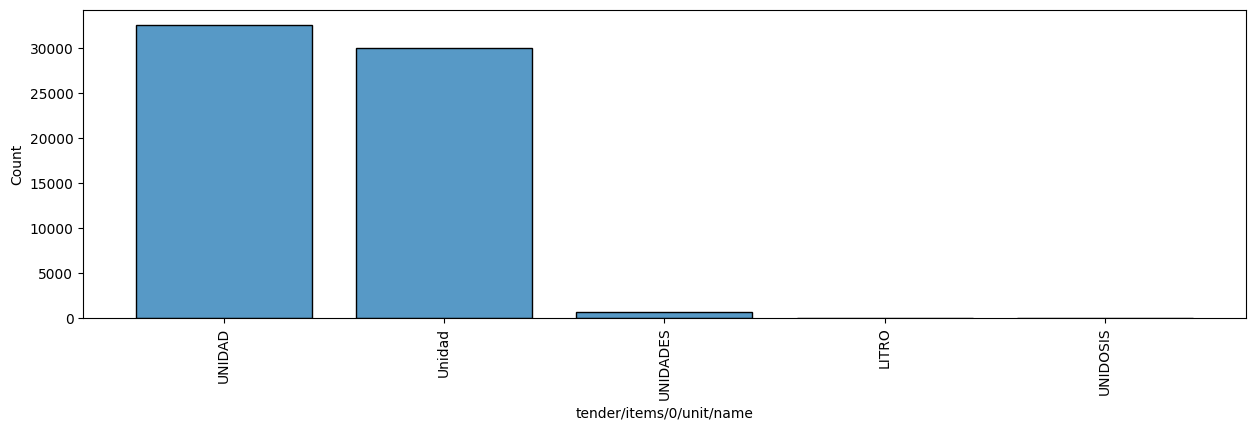

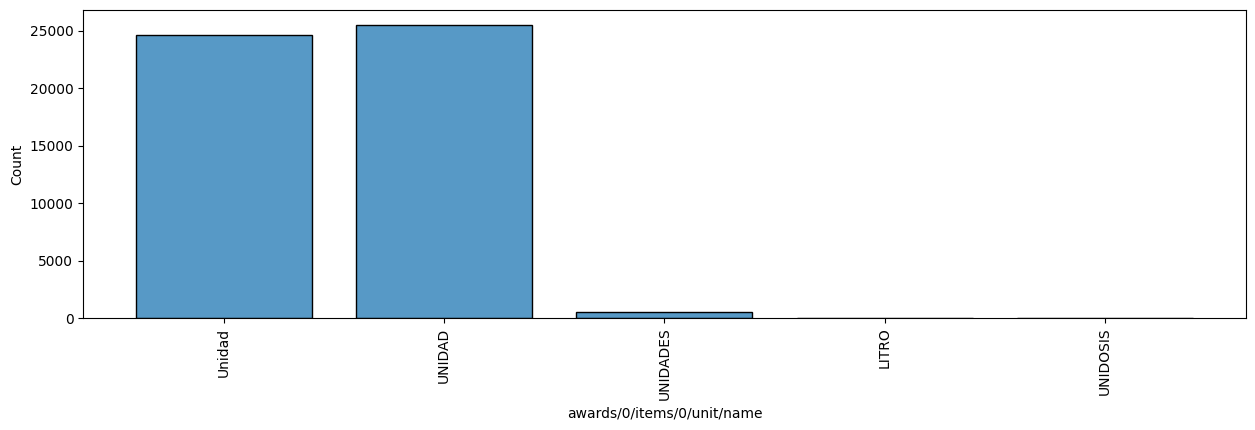

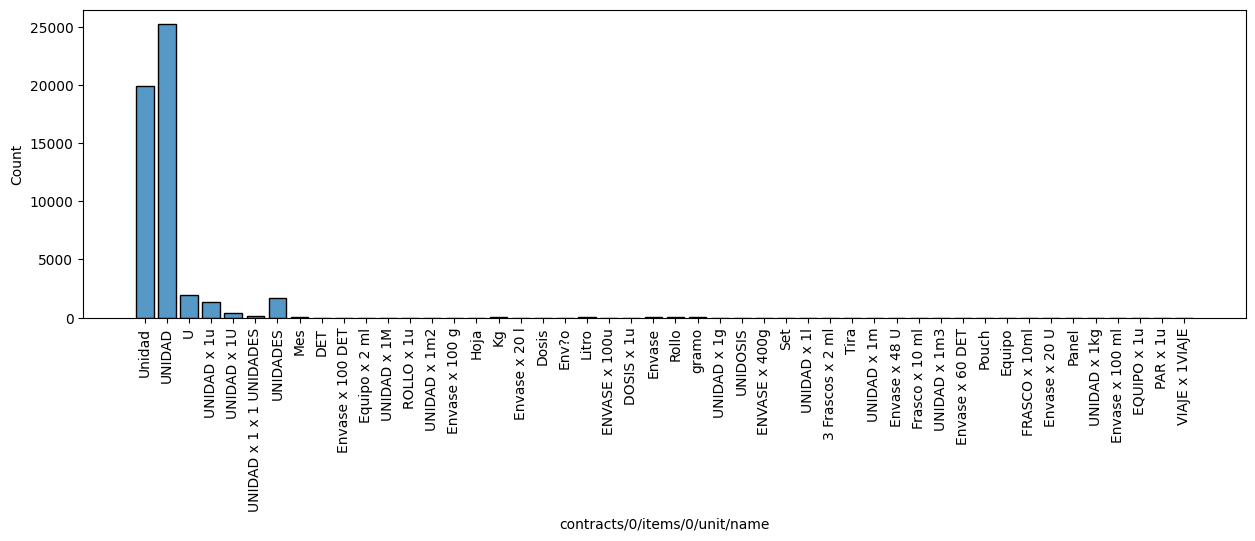

In [19]:
# grafico columnas especificas para normalizar

import seaborn as sns 
import matplotlib.pyplot as plt

col_unidad = ["tender/items/0/unit/name", 'awards/0/items/0/unit/name', 'contracts/0/items/0/unit/name']
for i in col_unidad:
    fig, ax = plt.subplots(figsize = (15, 4))
    ax.tick_params(axis='x', labelrotation = 90)
    sns.histplot(data=df, x=i, kde=False, shrink=.8, discrete=True)

In [20]:
# unifico las unidades

for i in col_unidad:
    df[i] = df[i].str.replace('UNIDADES', 'U')
    df[i] = df[i].str.replace('UnidadES', 'U')
    df[i] = df[i].str.replace('Unidad', 'U')
    df[i] = df[i].str.replace('UNIDAD', 'U')  
    df[i] = df[i].str.replace('UNIDOSIS', 'Unidosis')
    df[i] = df[i].str.replace('LITRO', 'Litro')

In [21]:
ocurrencia = df.pivot_table(index = col_unidad[-1], aggfunc ='size')
print(ocurrencia)
# df[col_unidad[-1]] = df[col_unidad[-1]].str.replace('1u', 'Unidad')
# df[col_unidad[-1]] = df[col_unidad[-1]].str.replace('U', 'Unidad')
df[col_unidad[-1]] = df[col_unidad[-1]].str.replace('U x 1 x 1 U', 'U')
df[col_unidad[-1]] = df[col_unidad[-1]].str.replace('U x 1U', 'U')
df[col_unidad[-1]] = df[col_unidad[-1]].str.replace('U x 1u', 'U')
df[col_unidad[-1]] = df[col_unidad[-1]].str.replace('DOSIS', 'Dosis')
df[col_unidad[-1]] = df[col_unidad[-1]].str.replace('EQUIPO', 'Equipo')
df[col_unidad[-1]] = df[col_unidad[-1]].str.replace('ENVASE', 'Envase')
# df[col_unidad[-1]] = df[col_unidad[-1]].str.replace('Env?o', 'Envio')
df[col_unidad[-1]] = df[col_unidad[-1]].str.replace('FRASCO', 'Frasco')
df[col_unidad[-1]] = df[col_unidad[-1]].str.replace('PAR', 'Par')
df[col_unidad[-1]] = df[col_unidad[-1]].str.replace('VIAJE', 'Viaje')
df[col_unidad[-1]] = df[col_unidad[-1]].str.replace('Unidad', 'U')
df[col_unidad[-1]] = df[col_unidad[-1]].str.replace('u', 'U')
df[col_unidad[-1]] = df[col_unidad[-1]].str.replace('Unidad', 'U')
df[col_unidad[-1]] = df[col_unidad[-1]].str.replace('u', 'U')
df[col_unidad[-1]] = df[col_unidad[-1]].str.replace('EqUipo', 'Equipo')

contracts/0/items/0/unit/name
3 Frascos x 2 ml        2
DET                     8
DOSIS x 1u              2
Dosis                   2
ENVASE x 100u           2
ENVASE x 400g           2
EQUIPO x 1u             2
Env?o                   2
Envase                 10
Envase x 100 DET        2
Envase x 100 g          2
Envase x 100 ml         2
Envase x 20 U           2
Envase x 20 l           2
Envase x 48 U           2
Envase x 60 DET         2
Equipo                  4
Equipo x 2 ml           2
FRASCO x 10ml           2
Frasco x 10 ml          2
Hoja                    4
Kg                     16
Litro                  24
Mes                    12
PAR x 1u                3
Panel                   2
Pouch                   4
ROLLO x 1u              8
Rollo                  10
Set                     2
Tira                    2
U                   48705
U x 1 x 1 U           168
U x 1M                  2
U x 1U                376
U x 1g                  2
U x 1kg                 8
U x 1l  

In [22]:
ocurrencia = df.pivot_table(index = col_unidad[-1], aggfunc ='size')
print(ocurrencia)

contracts/0/items/0/unit/name
3 Frascos x 2 ml        2
DET                     8
Dosis                   2
Dosis x 1U              2
Env?o                   2
Envase                 10
Envase x 100 DET        2
Envase x 100 g          2
Envase x 100 ml         2
Envase x 100U           2
Envase x 20 U           2
Envase x 20 l           2
Envase x 400g           2
Envase x 48 U           2
Envase x 60 DET         2
Equipo                  4
Equipo x 1U             2
Equipo x 2 ml           2
Frasco x 10 ml          2
Frasco x 10ml           2
Hoja                    4
Kg                     16
Litro                  24
Mes                    12
Panel                   2
Par x 1U                3
PoUch                   4
ROLLO x 1U              8
Rollo                  10
Set                     2
Tira                    2
U                   50561
U x 1M                  2
U x 1g                  2
U x 1kg                 8
U x 1l                  2
U x 1m                  6
U x 1m2 

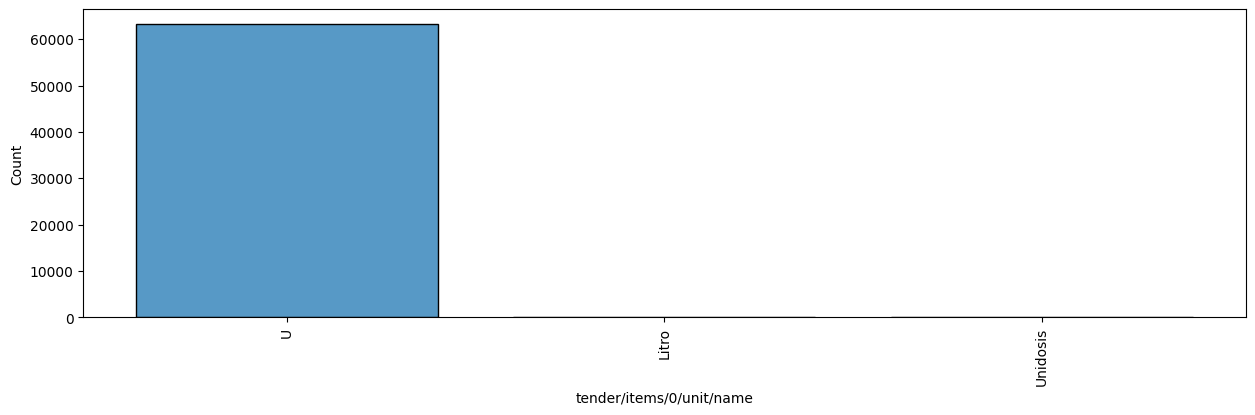

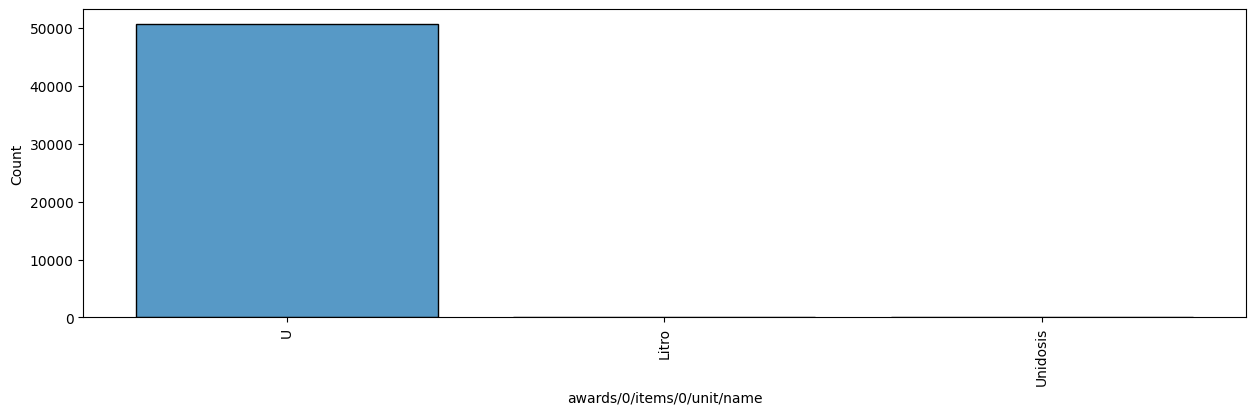

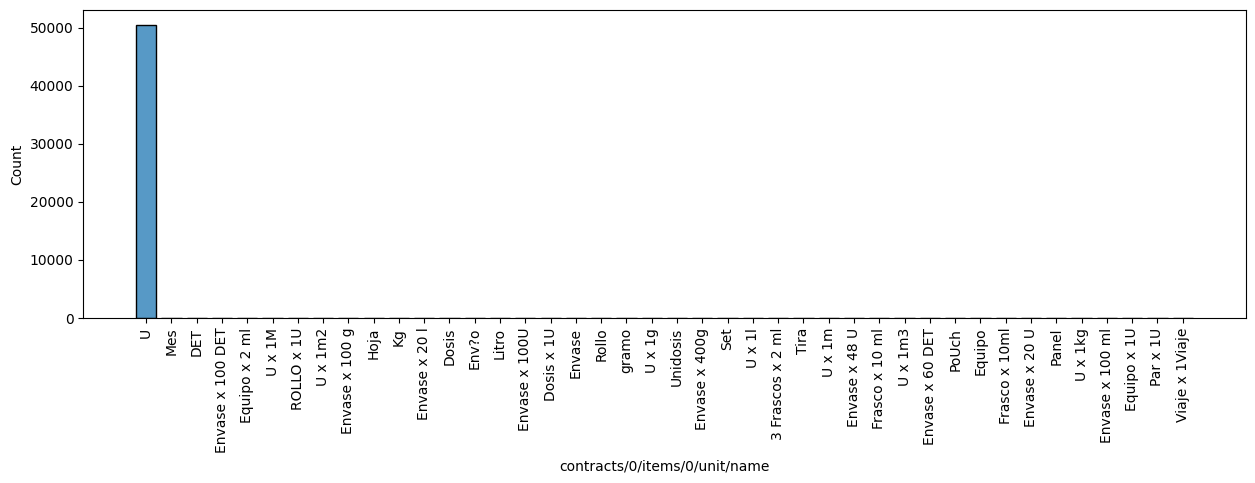

In [23]:
# Repito los graficos

col_unidad = ["tender/items/0/unit/name", 'awards/0/items/0/unit/name', 'contracts/0/items/0/unit/name']
for i in col_unidad:
    fig, ax = plt.subplots(figsize = (15, 4))
    ax.tick_params(axis='x', labelrotation = 90)
    sns.histplot(data=df, x=i, kde=False, shrink=.8, discrete=True)

In [24]:
# Para visualizar, se deje eliminar antes de commitear

# df.to_csv('bac_anuel_clean.csv')

In [25]:
# resultado

df.info()

# resultando un df con: 
# 63300 lineas, 2077 menos 
# 88 columnas, 25 menos                 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63300 entries, 0 to 65377
Data columns (total 88 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   date                                                        63300 non-null  object 
 1   tag                                                         63300 non-null  object 
 2   tender/id                                                   63300 non-null  object 
 3   tender/title                                                63300 non-null  object 
 4   tender/description                                          63300 non-null  object 
 5   tender/status                                               63218 non-null  object 
 6   tender/procuringEntity/id                                   63300 non-null  object 
 7   tender/value/currency                                       63300 non-null  object 
 

In [26]:
# Conviertro a excel 

df.to_excel("bac_anuel_clean.xlsx") 

In [27]:
# ANALISIS

<AxesSubplot:xlabel='tender/status', ylabel='Count'>

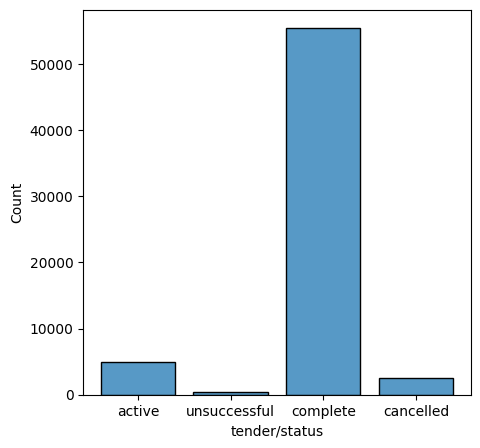

In [28]:
# status

fig, ax = plt.subplots(figsize = (5, 5))
sns.histplot(data=df, x="tender/status", kde=False, shrink=.8, discrete=True)

In [29]:
# Existe 4 categorias, la mas importante es "complete", ya que reprensenta los montos efectivos
# Veo el numero de ocurrencias de cada una

ocurrencia = df.pivot_table(index = ['tender/status'], aggfunc ='size')
print(ocurrencia)

tender/status
active           4961
cancelled        2467
complete        55388
unsuccessful      402
dtype: int64


In [30]:
# Trabajaremos con las licitaciones completas y las activas

complete = df['tender/status'] == 'complete'
complete_df = df[complete]
complete_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55388 entries, 23 to 65377
Columns: 88 entries, date to relatedProcesses/identifier
dtypes: bool(2), float64(15), int64(2), object(69)
memory usage: 36.9+ MB


In [31]:
active = df['tender/status'] == 'active'
active_df = df[active]
active_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4961 entries, 0 to 65308
Columns: 88 entries, date to relatedProcesses/identifier
dtypes: bool(2), float64(15), int64(2), object(69)
memory usage: 3.3+ MB


In [32]:
# Solo para visulizacion, no es necesario, eliminar antes de commitear

complete_df.to_csv('complete.csv')
active_df.to_csv('active.csv')

In [33]:
# Dentro de las licitacion con status complete, nos interesan las filas de supliers, empresas que ganaron cada una 

complete_suplier = complete_df['parties/0/roles'] == 'supplier'
complete_suplier_df = complete_df[complete_suplier]
complete_suplier_df.info(verbose=False)
complete_suplier_df.to_csv('complete_suplier.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20281 entries, 29 to 65377
Columns: 88 entries, date to relatedProcesses/identifier
dtypes: bool(2), float64(15), int64(2), object(69)
memory usage: 13.5+ MB


In [34]:
# hay lineas duplicadas, donde en una de ellas -> Q*$U != monto
# En monto de la licitacion es la misma, pero no la cantidad de items de premio difieren
# La licitacion es la misma? Tener en cuenta solo una?

In [35]:
# Analizo las divisas

ocurrencia = complete_suplier_df.pivot_table(index = ['tender/value/currency'], aggfunc ='size')
print(ocurrencia)

tender/value/currency
ARS    20157
EUR        2
USD      122
dtype: int64


In [36]:
# monto total en cada divisa

def totalmonto(divisa):
    aux = complete_suplier_df['tender/value/currency'] == divisa
    complete_suplier_ARG_df = complete_suplier_df[aux]
    print(round(complete_suplier_ARG_df['tender/value/amount'].sum(), 2))
    
    return 

print("Monto total en PESOS: ")
totalmonto('ARS')
print("\nMonto total en USD: ")
totalmonto('USD')
print("\nMonto total en EUR: ")
totalmonto('EUR')


Monto total en PESOS: 
933614053858.12

Monto total en USD: 
1301660265.97

Monto total en EUR: 
10649319.3


In [37]:
# Periodo

print("comienza:")
print(complete_suplier_df['date'].min())
print("\nconcluye:")
print(complete_suplier_df['date'].max())

comienza:
2022/01/03

concluye:
2022/10/27


In [38]:
# elimino el index del df

complete_suplier_df = complete_suplier_df.reset_index()
complete_suplier_df = complete_suplier_df.drop('index', axis=1)

In [45]:
# Monto por tipo de contratacion

# Verifico faltantes
complete_suplier_df['tender/procurementMethodDetails'].isnull().sum()
# Esta OK

0

In [46]:
# Funcion filtrado

def suma_filtro(filtro, col, divisa):
    # Aplico filtros
    aux_divisa = complete_suplier_df['tender/value/currency'] == divisa
    aux_filtro = complete_suplier_df[str(col)] == filtro
    # Sumo
    complete_suplier_filtro_df = complete_suplier_df[aux_divisa & aux_filtro]
    out = round(complete_suplier_filtro_df['tender/value/amount'].sum(), 2)
    
    return out


def filtrado(col):
    # Creo df 
    df_aux = pd.DataFrame(columns=['Rubro', 'Pesos', 'USD', 'EUR'])
    
    # ocurrencias de cada filtro
    ocurrencia = complete_suplier_df.pivot_table(index = [str(col)], aggfunc ='size')
    aux_filtro = ocurrencia.index
    
    # recorro y sumo para cada divisa
    for i in aux_filtro:
        ars = suma_filtro(i, col,'ARS')
        usd = suma_filtro(i, col,'USD')
        eur = suma_filtro(i, col,'EUR')
        
        # guardo en df
        df_aux.loc[len(df_aux), df_aux.columns] = i, ars, usd, eur

    return df_aux

In [47]:
# Monto por rubro
Monto_rubro_df = filtrado('tender/additionalProcurementCategories')

# Monto por reparticion
Monto_reparticion_df = filtrado('tender/procuringEntity/name')

# Monto por tipo de contratacion
Monto_contratacion_df = filtrado('tender/procurementMethodDetails')

# Monto por empresas
Monto_empresas_df = filtrado('contracts/0/signatories/0/name')

In [48]:
# Chequeo totales

print(round(Monto_rubro_df['Pesos'].sum(), 2))
print(round(Monto_reparticion_df['Pesos'].sum(), 2))
print(round(Monto_contratacion_df['Pesos'].sum(), 2))
print(round(Monto_empresas_df['Pesos'].sum(), 2))

933614053858.12
933592995558.12
933614053858.12
933614053858.12


In [49]:
# Guardo como xlsx

Monto_rubro_df.to_excel('MontoxRubro.xlsx')
Monto_reparticion_df.to_excel('MontoxReparticion.xlsx')
Monto_contratacion_df.to_excel('MontoxTipoContratacion.xlsx')
Monto_empresas_df.to_excel('MontoxEmpresa.xlsx')

In [50]:
# Ejecucion de presupuesto

# supongo que los contratos se pagan en su totalidad al finalizar

# Creo un df con fecha de fin de reparticion, rubro, empresa, contrato, fecha de fin, monto y divisa
ejec_presu_df = complete_suplier_df[['tender/procuringEntity/name','tender/additionalProcurementCategories','contracts/0/signatories/0/name', 
                                     'contracts/0/period/endDate', 'contracts/0/value/amount', 'tender/value/currency' ]]


In [51]:
# filtro por 2022

aux = ejec_presu_df['contracts/0/period/endDate'] < '2022/12/31'
ejec_presu_df = ejec_presu_df[aux]

# Reset index
ejec_presu_df = ejec_presu_df.reset_index()
ejec_presu_df = ejec_presu_df.drop('index', axis=1)

In [52]:
# guardo .slsx

ejec_presu_df.to_excel('EjecucionPresupuesto2022.xlsx')